# NOMAD Data Reduction Tutorials, by Dan and Kate

If you have questions or praise about these tutorials, you may contact me at: oldsdp@ornl.gov

If you have any complaints or especially difficult questions, you may contact me at: pagekl@ornl.gov

In [1]:
#this is just stuff to setup the enviornment and make the plots pretty.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from some_danfinitions import *


import warnings
warnings.filterwarnings('ignore')

%matplotlib notebook

num_colors = (6)
cm = plt.cm.get_cmap(name='viridis')
cc = [cm(1.*i/num_colors) for i in range(num_colors)]
mpl.rcParams['axes.color_cycle'] = cc


plt.rcParams.update({'font.size': 16})
plt.rcParams.update({'font.family': 'Helvetica'})



### Demo 3: PDF Optimization - Qmax

In the last tutorial, we made our very own PDF using our bare hands (and some math...).  Well done, us.  

In practice, we often have to optimize the parameters that go into the generation of the PDF before we can perform any high-quality fits or modeling.  This is because the little artifacts leftover in the merged S(Q)  (noise, changes in resolution, absorption edges, even binning scheme) will contribute artifacts in the PDF.  We often try and mitigate these artifacts by caerfully selecting the data we use to generate our final G(r).
For this demo, we're going to be playing aroun... I mean optimizing the employed $Q_{max}$ value.

To begin, let's read in and look at S(Q).  Along the way, let's also look at the data in a slightly different way, by plotting $Q^2\times S(Q)$.


In [2]:
q, sq_Si= read_nomad_sq('SQ_files/NOM_9999_NIST_Si_SQ.dat')

reading from file SQ_files/NOM_9999_NIST_Si_SQ.dat


<IPython.core.display.Javascript object>


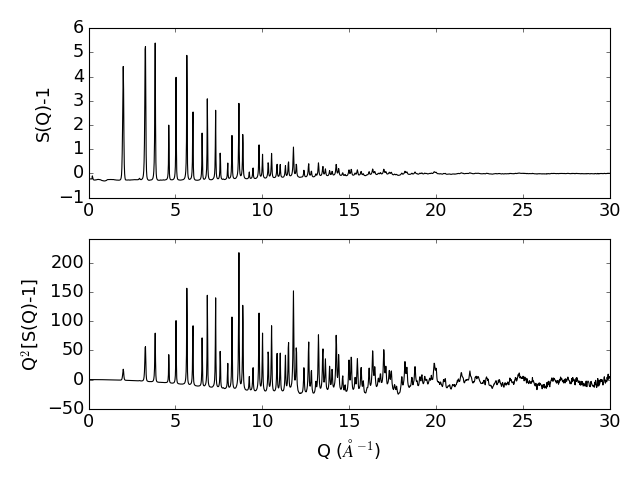

In [3]:
plt.figure()
ax = plt.subplot(211)

plt.plot(q,sq_Si,'k')
plt.ylabel('S(Q)-1')

plt.subplot(212,sharex=ax)

plt.plot(q,q**2*sq_Si,'k')

plt.xlabel('Q ($\AA^{-1}$)')
plt.ylabel('Q$^2$[S(Q)-1]')
plt.axis([0,30,-50,240])

plt.tight_layout()

By plotting the data scaled by Q-to a power (2, in this case) we amplify the high-Q signal.  This is important because the Fourier transform we take to generate G(r) is over the scaled $Q \times [S(Q)-1]$ version of the data.  

The first thing you should notice is that the seemingly flat-signal we saw in S(Q) alone (damped to almost nothing by Q=15) is actually loaded with information.  Note the oscillating background which seems to extend beyond the limits of our measured data.

We're going to see exactly what effect that data, above Q = 15, has on the final PDF, by limiting the employed $Q_{max}$.  To simplify things, we're going to use the same math as in the previous demo, however wrap it up in a nice python definition so you don't have to stare at it anymore.  The function is called thusly:

In [4]:
r, gr_full = pdf_transform(q,sq_Si,rmax=20)

<IPython.core.display.Javascript object>


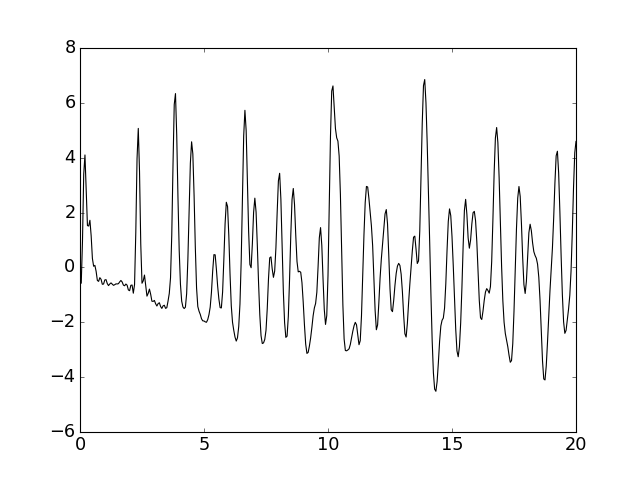

In [5]:
plt.figure()
plt.plot(r,gr_full,'k')

By default, this command will calculate G(r) from 0 to 20, with a spacing of delr=.05.

To alter the Q (or r) range used, optionally keywords can be passed like so:

In [6]:
r, gr_qmax15 = pdf_transform(q,sq_Si, qmax=15)
r, gr_qmax10 = pdf_transform(q,sq_Si, qmax=10)

cutting qmax
cutting qmax


<IPython.core.display.Javascript object>


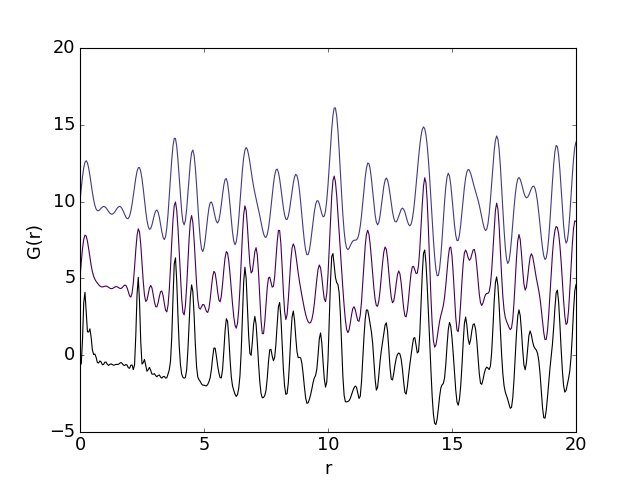

In [7]:
plt.figure()
offset = 5
plt.plot(r,gr_full,'k')
plt.plot(r,gr_qmax15+offset)
plt.plot(r,gr_qmax10+offset*2)

plt.xlabel('r')
plt.ylabel('G(r)')

Take a closer look comparing the PDFs, zooming in on individual peaks.  You should notice that the peaks in the PDF we generated from the 'cut' S(Q) (being cutoff at Q=15 and Q=10), while appearing at the same general location, are significantly broader than those from the full-range S(Q).

Remember, higher total Q-max values result in better resolution (as the resolution of the PDF goes roughly as 1/$Q_{max}$.

In general, we want to use as much of the S(Q) as we can, however we pay a price in that the signal-to-noise tends to drop at higher and higher values of Q.  At a certain point, extending Qmax adds only noise to your PDF, not information.

To see this in action, let's look at something far less crystalline than Si, SiO2 glass.

In [8]:
q, sq_glass = read_nomad_sq('SQ_files/NOM_9999_SiO2_glass_SQ.dat')

reading from file SQ_files/NOM_9999_SiO2_glass_SQ.dat


<IPython.core.display.Javascript object>


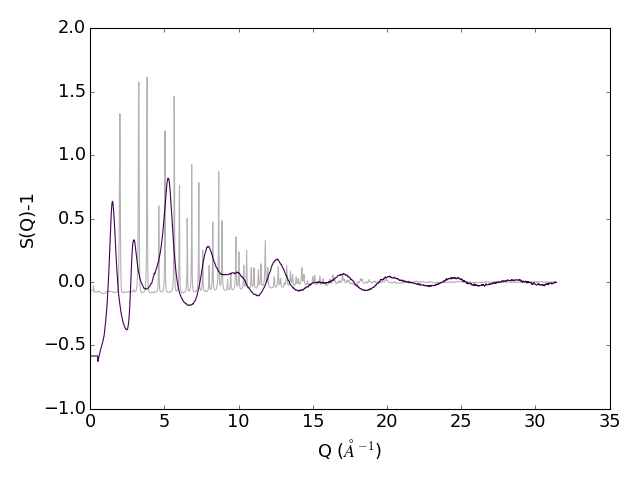

In [9]:
plt.figure()
plt.plot(q, sq_glass)
plt.plot(q, .3*sq_Si,'k',alpha=.3)
plt.xlabel('Q ($\AA^{-1}$)')
plt.ylabel('S(Q)-1')

plt.tight_layout()


Glass, being amorphous, has a very different looking pattern than the highly crystalline Si (which has been plotted, rescaled, in the background for comparison).

But who can do diffraction on amorphous materials?  Why, PDF of course :)

In [10]:
r, gr_glass = pdf_transform(q,sq_glass,qmax=30)

cutting qmax


<IPython.core.display.Javascript object>


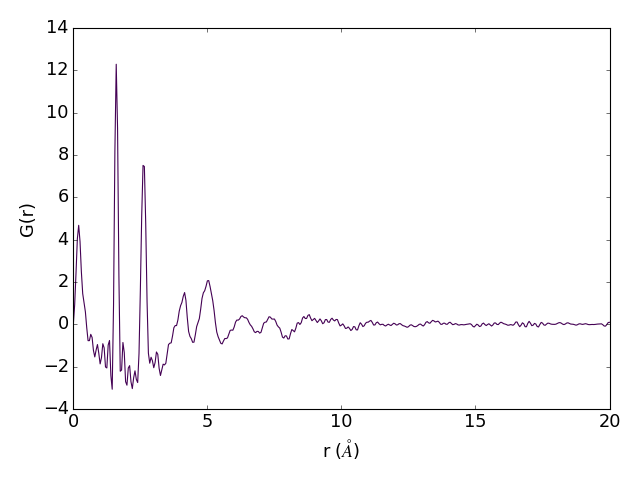

In [11]:
plt.figure()
plt.plot(r,gr_glass)
plt.xlabel('r ($\AA$)')
plt.ylabel('G(r)')
plt.tight_layout()

Besides the very clear atomic pair-correlation peaks, you may notice some high-frequency ripples in the PDF.  These aren't real, per say, but are leftover bits of 'non-resolved' intensity in the S(Q).  Recall that we assume [S(Q)-1] terminates at 0.  If it does not (as was the case above) we see the emergence of so-called termination ripples.  These are also related to the non-physical features at low-r.

For the case of the SiO2-glass above, depending on the question being asked, the particular G(r) might be sufficient.  However, we will use it as a demonstration of how to optimize the Qmax to produce a higher-quality PDF.

To begin, let's generate a series of PDFs from various Qmax values.  

In [12]:
r, gr_glass_29p5 = pdf_transform(q,sq_glass,qmax=29.5)
r, gr_glass_27p5 = pdf_transform(q,sq_glass,qmax=27.5)
r, gr_glass_26 = pdf_transform(q,sq_glass,qmax=26)
r, gr_glass_24p4 = pdf_transform(q,sq_glass,qmax=24.4)
r, gr_glass_21p2 = pdf_transform(q,sq_glass,qmax=21.2)


cutting qmax
cutting qmax
cutting qmax
cutting qmax
cutting qmax


<IPython.core.display.Javascript object>


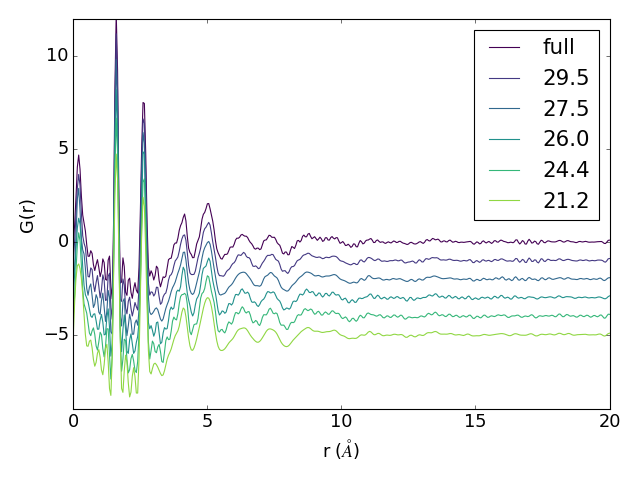

In [13]:
plt.figure()
offset = -1
plt.plot(r,gr_glass,label='full')
plt.plot(r,gr_glass_29p5+offset,label='29.5')

plt.plot(r,gr_glass_27p5+offset*2,label='27.5')
plt.plot(r,gr_glass_26+offset*3,label='26.0')

plt.plot(r,gr_glass_24p4+offset*4,label='24.4')
plt.plot(r,gr_glass_21p2+offset*5,label='21.2')

plt.xlabel('r ($\AA$)')
plt.ylabel('G(r)')
plt.legend(loc=0)
plt.axis([0,20,-9,12])
plt.tight_layout()

Just from a glance, I would say that using $Q_{max} = 27.5$ or 21.2 will result in the cleanest PDF.  Close comparison of the two would probably suggest we use the higher resolution $Q_{max}=27.5$ PDF, as the low-r peaks in the $Q_{max}=21.2$ set are understandably broadened.

<IPython.core.display.Javascript object>


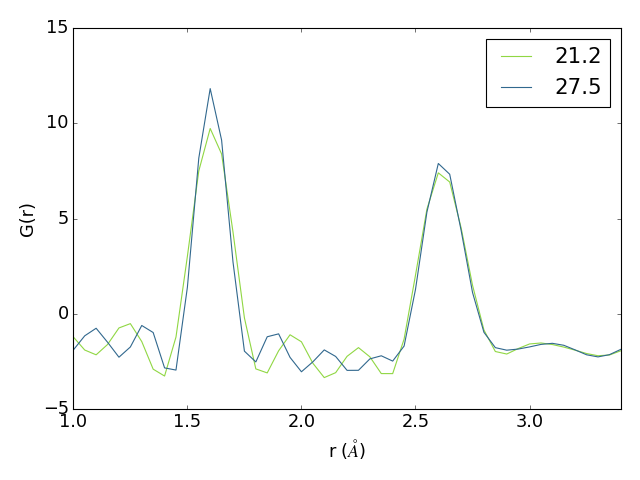

In [14]:
plt.figure()
plt.plot(r,gr_glass_21p2,label='21.2',c=cc[5])
plt.plot(r,gr_glass_27p5,label='27.5',c=cc[2])
plt.axis([1,3.4,-5,15])
plt.xlabel('r ($\AA$)')
plt.ylabel('G(r)')
plt.legend(loc=0)
plt.tight_layout()

To understand how we came up with the 'good' pick for Qmax, one needs only to look at the $Q^2\times[S(Q)-1]$ plot.  Note we have selected a high-Q$_{max}$, but one where the data terminates to zero.

<IPython.core.display.Javascript object>


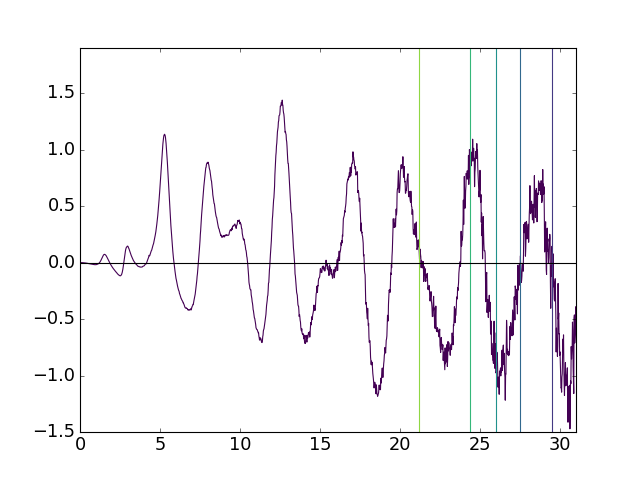

[0, 31, -1.5, 1.9]

In [15]:
plt.figure()
plt.plot(q,q**2*sq_glass*.05)

plt.plot([29.5,29.5],[-2,5])
plt.plot([27.5,27.5],[-2,5])
plt.plot([26,26],[-2,5])
plt.plot([24.4,24.4],[-2,5])
plt.plot([21.2,21.2],[-2,5])
plt.plot([0,31],[0,0],'k')
plt.axis([0,31,-1.5,1.9])

From here, you can try optimizing PDFs from any of the other datasets.  If you are in for a real challange, try changing the employed Qmin, and see if you can understand what effect that plays on the PDF.  Ask Kate for more details!

A few of them are calculated below for the Si case:

In [16]:
r, gr_Si_qmin0 = pdf_transform(q,sq_glass)
r, gr_Si_qmin1 = pdf_transform(q,sq_glass,qmin=1)
r, gr_Si_qmin3 = pdf_transform(q,sq_glass,qmin=3)
r, gr_Si_qmin5 = pdf_transform(q,sq_glass,qmin=5)


cutting qmin
cutting qmin
cutting qmin


<IPython.core.display.Javascript object>


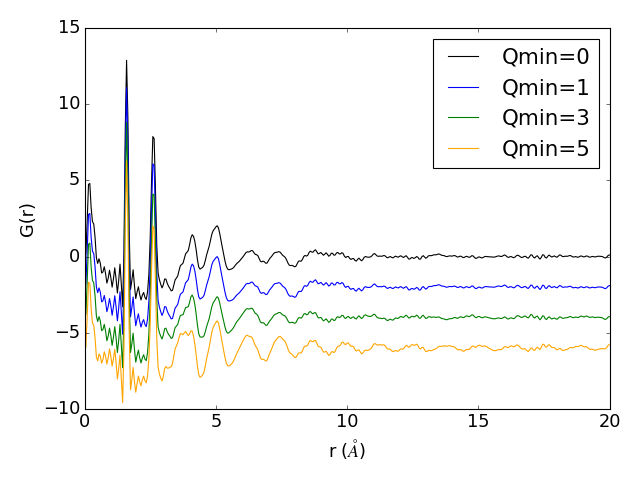

In [18]:
plt.figure()
offset=-2
plt.plot(r,gr_Si_qmin0,'k',label='Qmin=0')
plt.plot(r,gr_Si_qmin1+offset,'b',label='Qmin=1')
plt.plot(r,gr_Si_qmin3+offset*2,'g',label='Qmin=3')
plt.plot(r,gr_Si_qmin5+offset*3,'orange',label='Qmin=5')
plt.xlabel('r ($\AA$)')
plt.ylabel('G(r)')
plt.legend(loc=0)
plt.tight_layout()